In [7]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math
import seaborn as sns
import os

In [8]:
myworkingdirectory = r"C:\Users\eric.englin\Desktop\TSP"
os.chdir(myworkingdirectory)

In [27]:
crash_df = pd.read_csv("./crash_data_joined.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
crash_df.head()

,INCID_NO,CASENUM,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,PARK_ALPHA,STATE,CRASH_DATE,CRASH_TIME,LATITUDE,LONGITUDE,Data_Origin,UNIT_NAME,REGION,UNIT_TYPE
0,ABLI9000000001,5540000001,0.0,0,0,0,0,0,2,0,...,ABLI,KY,1990-08-05,1115.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park
1,ABLI9100000001,5540910001,2.0,0,0,1,0,0,0,0,...,ABLI,KY,1991-08-02,1400.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park
2,ACAD0000000003,1700000003,1.0,0,0,1,0,0,0,0,...,ACAD,ME,2000-01-27,800.0,0.0,0.0,STARS,Acadia National Park,NE,National Park
3,ACAD0000000014,1700000014,2.0,0,0,1,0,0,0,0,...,ACAD,ME,2000-04-17,1310.0,0.0,0.0,STARS,Acadia National Park,NE,National Park
4,ACAD0000000026,1700000026,1.0,0,0,1,0,0,0,0,...,ACAD,ME,2000-03-26,1840.0,0.0,0.0,STARS,Acadia National Park,NE,National Park


In [29]:
numNoneTypebyRow=crash_df.isnull().sum(axis=1).tolist()
numNoneTypebyColumn=crash_df.isnull().sum(axis=0).tolist()
x=len(numNoneTypebyRow)
y=len(numNoneTypebyColumn)
fullRow=0
fullCol=0
for element in numNoneTypebyRow:
    if element==0:
        fullRow=fullRow+1
for element in numNoneTypebyColumn:
    if element==0:
        fullCol=fullCol+1
print('Total Number of Rows', x)
print('Number of Full Rows',fullRow)
print('Total Number of Columns', y)
print('Number of Full Columns',fullCol)

Total Number of Rows 216772
Number of Full Rows 96804
Total Number of Columns 30
Number of Full Columns 12


In [30]:
percentIncomplete=[]
for element in numNoneTypebyRow:
    percentIncomplete.append(element/58)

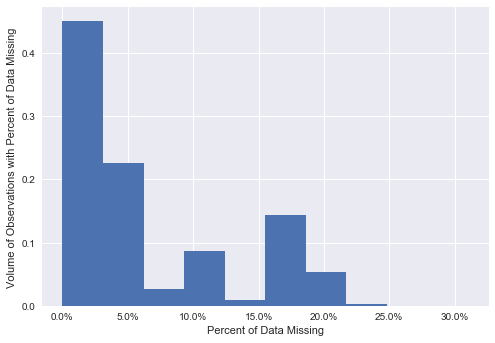

In [31]:
plt.hist(percentIncomplete, weights=np.ones(len(percentIncomplete)) / len(percentIncomplete))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Percent of Data Missing')
plt.ylabel('Volume of Observations with Percent of Data Missing ')
plt.show()

In [38]:
crash_df['CRASH_DATE']=pd.to_datetime(crash_df['CRASH_DATE'])
crash_df['day_of_week'] = crash_df['CRASH_DATE'].dt.day_name
crash_df['year'] = crash_df['CRASH_DATE'].dt.year

In [33]:
df_day_grouped=crash_df.groupby(['day_of_week']).count()
df_day_grouped=df_day_grouped.reset_index()
df_day_grouped=df_day_grouped[['day_of_week','INCID_NO']].sort_values(by='day_of_week')
df_day_grouped.rename(columns={'INCID_NO': 'number_of_crashes'}, inplace=True)
df_day_grouped=df_day_grouped.reindex([1,5,6,4,0,2,3])
df_day_grouped

,day_of_week,number_of_crashes
1,Monday,28402
5,Tuesday,29052
6,Wednesday,29908
4,Thursday,30585
0,Friday,33706
2,Saturday,34568
3,Sunday,30550


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


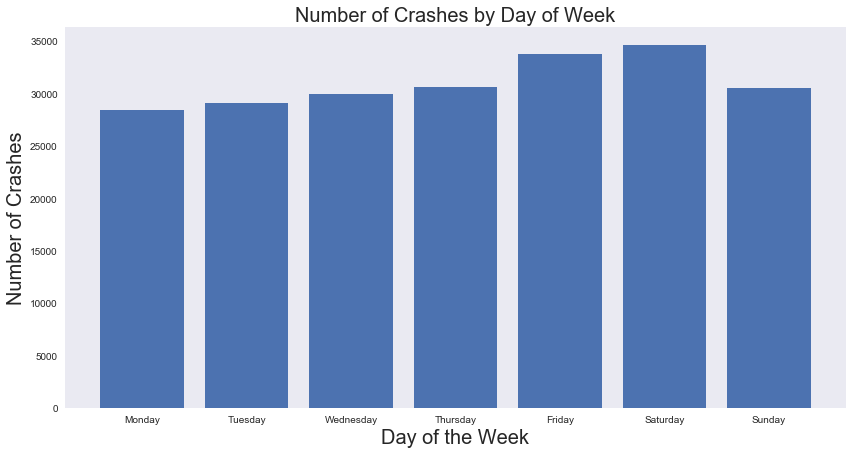

In [34]:
plt.style.use('seaborn')

tick_spacing = 3 
fig,ax = plt.subplots(1,1, figsize=(14, 7))
ax.bar(df_day_grouped.day_of_week, df_day_grouped.number_of_crashes, linewidth=4)
ax.set_title('Number of Crashes by Day of Week', fontsize=20)

ax.set_xlabel('Day of the Week', fontsize=20)
ax.set_ylabel('Number of Crashes', fontsize=20)
ax.grid('off')

plt.show()

In [35]:
crash_df.columns

Index(['INCID_NO', 'CASENUM', 'NUM_OCC', 'Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class', 'No Injury',
       'Possible Injury', 'Non-incapacitating Injury', 'Incapacitating Injury',
       'Fatality', 'Unknown Injury', 'PARK_ALPHA', 'STATE', 'CRASH_DATE',
       'CRASH_TIME', 'LATITUDE', 'LONGITUDE', 'Data_Origin', 'UNIT_NAME',
       'REGION', 'UNIT_TYPE', 'day_of_week'],
      dtype='object')

In [25]:
df_data_origin=crash_df.groupby(['Data_Origin']).sum()


KeyError: 'Data Origin'

In [40]:
df_year_origin=crash_df.groupby(['Data_Origin', "year"]).sum()
df_year_origin=df_year_origin.reset_index()
#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_year_origin

,Data_Origin,year,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,Other Accident Class,No Injury,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,CRASH_TIME,LATITUDE,LONGITUDE
0,CDS,1920.0,0.0,0,0,1,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1959.0,0.00000,0.00000
1,CDS,1930.0,0.0,1,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1330.0,36.95588,-80.15845
2,CDS,1931.0,0.0,0,1,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1552.0,37.66201,-119.71023
3,CDS,1940.0,0.0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1940.0,48.51074,-113.98629
4,CDS,1944.0,0.0,0,0,0,0,0,1,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,1610.0,37.74620,-119.58335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,STARS,2003.0,30673.0,596,8690,1980,88,66,485,2,...,0,7399.0,450.0,399.0,165.0,12.0,133.0,8070539.0,0.00000,0.00000
71,STARS,2004.0,25997.0,644,8490,1869,99,84,474,4,...,0,7594.0,428.0,370.0,198.0,14.0,106.0,8066523.0,0.00000,0.00000
72,STARS,2005.0,23096.0,606,7477,1616,77,80,492,0,...,0,6618.0,487.0,384.0,156.0,22.0,66.0,7278914.0,0.00000,0.00000
73,STARS,2006.0,7119.0,214,1499,542,31,21,139,0,...,0,1825.0,113.0,95.0,26.0,5.0,32.0,2057584.0,0.00000,0.00000


In [43]:
cds_year = df_year_origin.loc[df_year_origin['Data_Origin']=='CDS']
imars_year = df_year_origin.loc[df_year_origin['Data_Origin']=='IMARS']
stars_year = df_year_origin.loc[df_year_origin['Data_Origin']=='STARS']

In [49]:
imars_year

,Data_Origin,year,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,Other Accident Class,No Injury,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,CRASH_TIME,LATITUDE,LONGITUDE
46,IMARS,2012.0,98.0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,106216.0,0.000000,0.000000
47,IMARS,2013.0,524.0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,425960.0,0.000000,0.000000
48,IMARS,2014.0,35.0,3,7,0,0,0,0,0,...,0,0.0,1.0,0.0,5.0,2.0,0.0,41448.0,179.318378,36.474629
49,IMARS,2015.0,17.0,3,1,1,0,0,0,0,...,0,2.0,0.0,3.0,0.0,0.0,0.0,20139.0,0.000000,0.000000
50,IMARS,2016.0,212440.0,2413,62162,29897,8,593,16931,4,...,9564,108692.0,16163.0,4680.0,7494.0,10380.0,22145.0,3098250.0,8577.866733,-12910.200435
51,IMARS,2017.0,144540.0,7003,18819,13445,91,1300,16668,0,...,69294,60587.0,1403.0,3893.0,613.0,59.0,27807.0,3226772.0,15875.769146,-36491.649251
52,IMARS,2018.0,9531.0,944,1866,3705,15,11,971,0,...,214,4573.0,464.0,131.0,88.0,14.0,127.0,3695452.0,60518.558732,-118341.408832
53,IMARS,2019.0,5633.0,1079,1883,1264,22,15,546,4,...,91,1553.0,210.0,158.0,74.0,44.0,25.0,3860830.0,74380.828026,-137910.293499
54,IMARS,2020.0,4580.0,734,1486,1240,44,16,363,0,...,35,1604.0,173.0,121.0,86.0,16.0,18.0,3148400.0,60499.406646,-111131.129985
55,IMARS,2021.0,2175.0,360,714,480,18,16,180,0,...,24,1006.0,114.0,81.0,32.0,7.0,29.0,1432685.0,22755.726262,-40130.159097


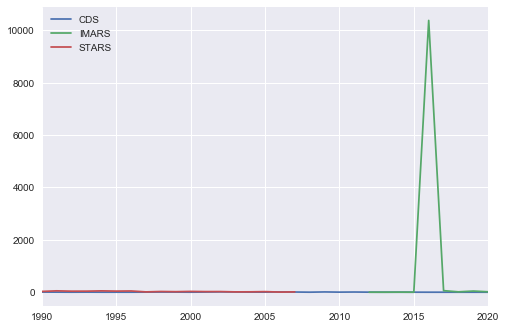

In [48]:
plt.plot(cds_year["year"], cds_year['Fatality'], label = 'CDS')
plt.plot(imars_year["year"], imars_year['Fatality'], label = 'IMARS')
plt.plot(stars_year["year"], stars_year['Fatality'], label = 'STARS')
plt.xlim([1990,2020])
plt.legend()